# Step 1: Import necessary libraries

In [133]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_regression
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the dataset

In [134]:
dataset = pd.read_csv("Housing.csv")

# Step 3: Data Exploration and Preprocessing

In [135]:
print(dataset.shape)
dataset.head()

(545, 13)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [136]:
# Data Cleaning
missing_values = dataset.isnull().sum()
print("Missing Values:")
print(missing_values)
dataset.dropna(inplace=True)

Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [137]:
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [138]:
# Convert categorical variables to numeric using one-hot encoding
dataset = pd.get_dummies(dataset, columns=['mainroad', 'guestroom', 'basement', 'hotwaterheating','airconditioning', 'prefarea', 'furnishingstatus'], drop_first=True)
dataset.head()

,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


# Step 4: Predictive Analysis



Correlations with Price:
area                               0.535997
bathrooms                          0.517545
airconditioning_yes                0.452954
stories                            0.420712
parking                            0.384394
bedrooms                           0.366494
prefarea_yes                       0.329777
mainroad_yes                       0.296898
guestroom_yes                      0.255517
basement_yes                       0.187057
hotwaterheating_yes                0.093073
furnishingstatus_semi-furnished    0.063656
furnishingstatus_unfurnished      -0.280587
dtype: float64


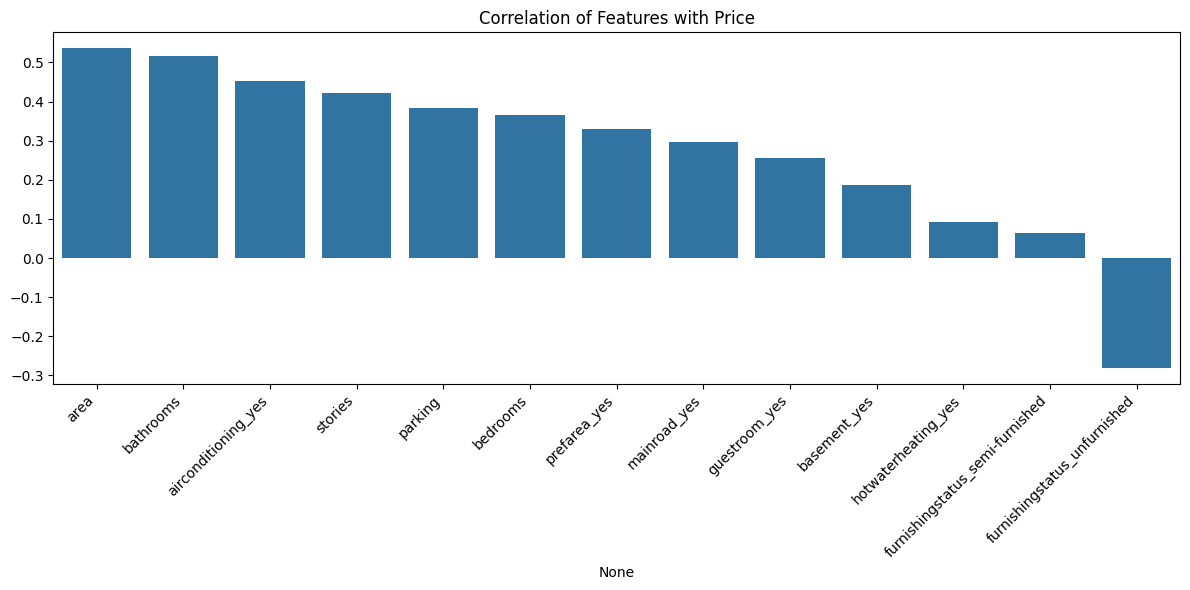

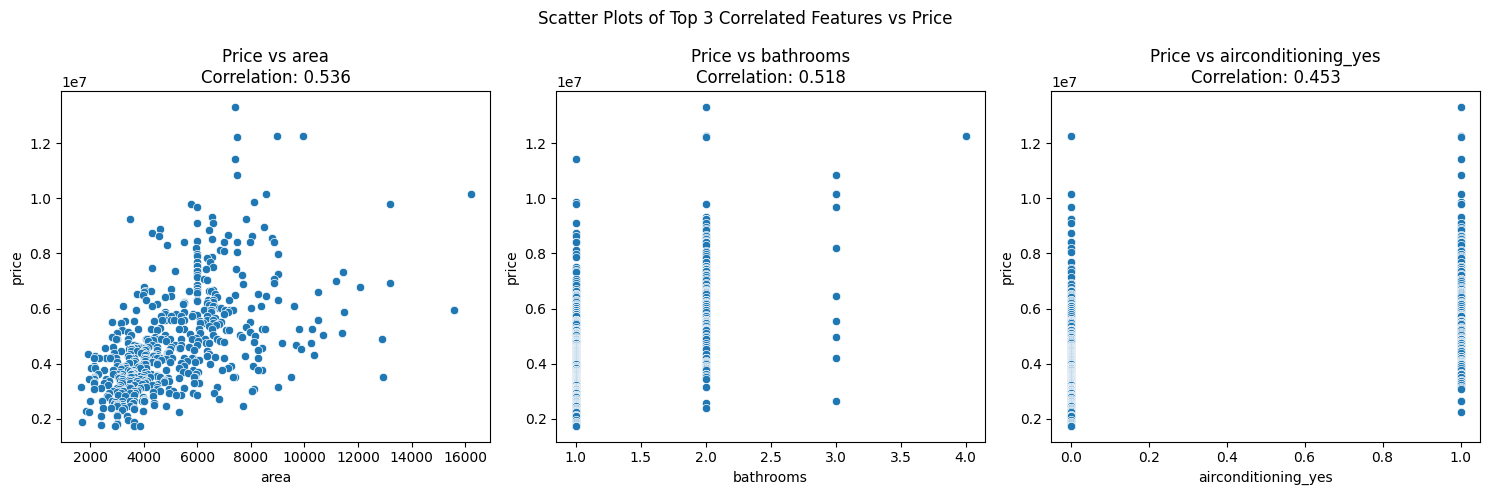


Summary of correlations with price:

Strongest positive correlations:
area                   0.535997
bathrooms              0.517545
airconditioning_yes    0.452954
stories                0.420712
parking                0.384394
dtype: float64

Strongest negative correlations:
furnishingstatus_unfurnished   -0.280587
dtype: float64


In [139]:
correlations = dataset.corrwith(dataset['price']).sort_values(ascending=False)
correlations = correlations.drop('price')
print("\nCorrelations with Price:")
print(correlations)

plt.figure(figsize=(12, 6))
sns.barplot(x=correlations.index, y=correlations.values)
plt.xticks(rotation=45, ha='right')
plt.title('Correlation of Features with Price')
plt.tight_layout()
plt.show()

top_features = correlations[:3].index
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Scatter Plots of Top 3 Correlated Features vs Price')

for i, feature in enumerate(top_features):
    sns.scatterplot(data=dataset, x=feature, y='price', ax=axes[i])
    axes[i].set_title(f'Price vs {feature}\nCorrelation: {correlations[feature]:.3f}')

plt.tight_layout()
plt.show()

print("\nSummary of correlations with price:")
print("\nStrongest positive correlations:")
print(correlations[correlations > 0].head())
print("\nStrongest negative correlations:")
print(correlations[correlations < 0].head())

In [140]:
X = dataset[['area', 'bedrooms', 'airconditioning_yes', 'stories', 'parking', 'furnishingstatus_unfurnished']]
y = dataset['price']

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)


(436, 6)
(109, 6)


In [142]:
# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 2256155310497.3057
R-squared: 0.5536405271798975
Mean Absolute Error: 1077903.3417447784


In [147]:
def predict_house_price():
    try:
        print("\nEnter the following details about the house:")
        
        # Area validation
        while True:
            try:
                area = float(input("Area (in square feet, 1650-16200): "))
                if 1650 <= area <= 16200:
                    break
                print("Please enter an area between 1650 and 16200 square feet.")
            except ValueError:
                print("Please enter a valid number.")
        
        # Bedrooms validation
        while True:
            try:
                bedrooms = int(input("Number of bedrooms (1-6): "))
                if 1 <= bedrooms <= 6:
                    break
                print("Please enter a number between 1 and 6.")
            except ValueError:
                print("Please enter a valid number.")
        
        # Bathrooms validation
        while True:
            try:
                bathrooms = int(input("Number of bathrooms (1-4): "))
                if 1 <= bathrooms <= 4:
                    break
                print("Please enter a number between 1 and 4.")
            except ValueError:
                print("Please enter a valid number.")
        
        # Stories validation
        while True:
            try:
                stories = int(input("Number of stories (1-4): "))
                if 1 <= stories <= 4:
                    break
                print("Please enter a number between 1 and 4.")
            except ValueError:
                print("Please enter a valid number.")

        # Parking validation
        while True:
            try:
                parking = int(input("Number of parking spaces (0-3): "))
                if 0 <= parking <= 3:
                    break
                print("Please enter a number between 0 and 3.")
            except ValueError:
                print("Please enter a valid number.")

        # Create input array for prediction with all features
        input_data = pd.DataFrame({
            'area': [area],
            'bedrooms': [bedrooms],
            'bathrooms': [bathrooms],
            'stories': [stories],
            'parking': [parking],
            'mainroad_yes': [True],
            'guestroom_yes': [False],
            'basement_yes': [False],
            'hotwaterheating_yes': [False],
            'airconditioning_yes': [True],
            'prefarea_yes': [True],
            'furnishingstatus_semi-furnished': [False],
            'furnishingstatus_unfurnished': [False]
        })
        
        # Make prediction
        predicted_price = model.predict(input_data)[0]
        
        print("\n=== Prediction Results ===")
        print(f"Entered Features:")
        print(f"- Area: {area:,.0f} sq ft")
        print(f"- Bedrooms: {bedrooms}")
        print(f"- Bathrooms: {bathrooms}")
        print(f"- Stories: {stories}")
        print(f"- Parking Spaces: {parking}")
        print(f"\nPredicted House Price: ₹{predicted_price:,.2f}")
        print(f"\nModel Performance Metrics:")
        print(f"R-squared (Accuracy): {r2*100:.2f}%")
        print(f"Mean Absolute Error: ₹{mae:,.2f}")
        
        return predicted_price
        
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return None

# First, update the model training code to use all features
X = dataset[['area', 'bedrooms', 'bathrooms', 'stories', 'parking',
             'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
             'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished',
             'furnishingstatus_unfurnished']]
y = dataset['price']

# Split the data and train the model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("\nHouse Price Prediction System")
print("============================")
prediction = predict_house_price()


House Price Prediction System

Enter the following details about the house:



=== Prediction Results ===
Entered Features:
- Area: 1,800 sq ft
- Bedrooms: 2
- Bathrooms: 1
- Stories: 3
- Parking Spaces: 1

Predicted House Price: ₹5,169,287.34

Model Performance Metrics:
R-squared (Accuracy): 65.29%
Mean Absolute Error: ₹970,043.40
